# Análise de Sentimentos - Tweets

In [608]:
#Conjunto de importações
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

In [609]:
#Armazenamento de documentos (frases) na lista dataset
dataset = [("@luciogirotto: TERCEIRA RECLAMAÇAO bradesco alobradesco bancocentralbr BandNews datenaoficial ReclameAQUI http://t.co/v9SgaBB27A"),
           ("@RadioRockPuro: @Nilson_de_Vix @claro um pior que outro, não tem serviço que preste// nenhum deles, @Claro, presta. E, são caríssimos. .."),
           ("As melhores e verdadeiras canções compomos quando temos certeza do caminho a seguir. Falo do que vivo, vivo do... http://t.co/6pVMQFg0LM"),
           ("Boa sorte pra querida Cris Duclos da vivo que ta concorrendo ao Caboré 2013. Bacana participar do… http://t.co/xvtwR8UDDB"),
           ("Conte uma História para uma criança Conte uma história pra Mim Itaú Itau Itaú Cultural Itaú Personnalité... http://t.co/TOir8zL4wE"),
           ("Péssimo é a palavra que melhor define o serviço 3G da @ClaroBrasil. O SAC não funciona e a rede vive indisponível"),
           ("Quero q todo mundo tenha dois chocolates: um pra comer e outro pra quem ta pedindo. ^-^ ^-^ Bradesco QueroQueTodoMundoTenha"),
           ("SE FOR FRACO NAO FICA DE PEH,VIVO NO LIMITE,SOH Q NAO SOU LIMITADO. Vivo"),
           ("ADSL OFF, Oi Velox Off novamente... que maravilha!"),
           ("AloBradesco chega de desculpas quero soluções!!! Mais uma vez os caixas do auto-atendimento fora do ar as 11:15 de 13/12/13 SOLUÇÕES!!!"),
           ("alobradesco mais de 30 minutos e não fui atendido ag 2178"),
           ("bancodobrasil boa tarde, não consigo acessar a conta pela net. O que está acontecendo? "),
           ("bancodobrasil fdp. Paguei minha multa já faz tempo e olho no site ta como não paga"),
           ("bancodobrasil me impressionando a cada dia: abrem extratos aleatorios no app pra mobile e dizem q agr ta td bem e q nao foi serio! "),
           ("BancodoBrasil,  incompetência define! "),
           ("BancoItau ItauBanco Itau Horrível ficar esperando por um longo período sem explicação. Acho digno, ao menos uma informação. "),
           ("bradesco, o banco mais retrógrado do brasil!!!!! "),
           ("Bradesco, sempre fudendo com a vida das pessoas! http://t.co/js3pF4n2Yc"),
           ("Cine EmChamas JogosVorazes @Bb' AmorMeu Lôra Branquelo Perfeito :) @Betinho_melo http://t.co/0fzpDxHNqM"),
            ("cineart itaucard paga meia agora. Muito bom http://t.co/uIMWqfinIQ")]

In [610]:
#Armazenamento das polaridades de cada documento (frase) na lista polaris
# polaris = [-1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1,-1, -1, -1, -1, -1, -1, 1, 1]
# Uma polaridade com 50% de balanceamento
polaris = [-1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1]

In [611]:
#Divisão dos dados das listas dataset e polaris em conjuntos de treinamento e validação
dados_treino, dados_val, pols_treino, pols_val = train_test_split(dataset, polaris, test_size=0.30)

In [612]:
#Print do conjunto de treinamento e suas respectivas polaridades
print("Conjunto de Treinamento")
print(dados_treino)
print("Polaridades do Conjunto de Treinamento")
print(pols_treino)
print("\n---------------------------------------------\n")
#Print do conjunto de validação e suas respectivas polaridades
print("Conjunto de Validação")
print(dados_val)
print("Polaridades do Conjunto de Validação")
print(pols_val)

Conjunto de Treinamento
['bancodobrasil fdp. Paguei minha multa já faz tempo e olho no site ta como não paga', 'Bradesco, sempre fudendo com a vida das pessoas! http://t.co/js3pF4n2Yc', 'SE FOR FRACO NAO FICA DE PEH,VIVO NO LIMITE,SOH Q NAO SOU LIMITADO. Vivo', 'Quero q todo mundo tenha dois chocolates: um pra comer e outro pra quem ta pedindo. ^-^ ^-^ Bradesco QueroQueTodoMundoTenha', 'BancoItau ItauBanco Itau Horrível ficar esperando por um longo período sem explicação. Acho digno, ao menos uma informação. ', 'bancodobrasil me impressionando a cada dia: abrem extratos aleatorios no app pra mobile e dizem q agr ta td bem e q nao foi serio! ', 'Péssimo é a palavra que melhor define o serviço 3G da @ClaroBrasil. O SAC não funciona e a rede vive indisponível', 'ADSL OFF, Oi Velox Off novamente... que maravilha!', 'alobradesco mais de 30 minutos e não fui atendido ag 2178', 'bancodobrasil boa tarde, não consigo acessar a conta pela net. O que está acontecendo? ', 'Conte uma História para 

In [613]:
#Cria uma instância para a bag-of-words   
bag = CountVectorizer()

In [614]:
#Método fit_transform: 
#fit = cria e aprende a bag
#transform = cria a matriz termo-documento
bag_treino = bag.fit_transform(dados_treino)

In [615]:
#A função sorted() ordena o vocabulário da bag-of-words   
print("Vocabulário da bag-of-words")
print(sorted(bag.vocabulary_))

print("\n---------------------------------------------\n")

Vocabulário da bag-of-words
['2178', '30', '3g', 'abrem', 'acessar', 'acho', 'acontecendo', 'adsl', 'ag', 'agora', 'agr', 'aleatorios', 'alobradesco', 'ao', 'app', 'atendido', 'banco', 'bancocentralbr', 'bancodobrasil', 'bancoitau', 'bandnews', 'bem', 'boa', 'bom', 'bradesco', 'brasil', 'cada', 'chocolates', 'cineart', 'clarobrasil', 'co', 'com', 'comer', 'como', 'consigo', 'conta', 'conte', 'criança', 'cultural', 'da', 'das', 'datenaoficial', 'de', 'define', 'dia', 'digno', 'dizem', 'do', 'dois', 'esperando', 'está', 'explicação', 'extratos', 'faz', 'fdp', 'fica', 'ficar', 'foi', 'for', 'fraco', 'fudendo', 'fui', 'funciona', 'história', 'horrível', 'http', 'impressionando', 'indisponível', 'informação', 'itau', 'itaubanco', 'itaucard', 'itaú', 'js3pf4n2yc', 'já', 'limitado', 'limite', 'longo', 'luciogirotto', 'mais', 'maravilha', 'me', 'meia', 'melhor', 'menos', 'mim', 'minha', 'minutos', 'mobile', 'muito', 'multa', 'mundo', 'nao', 'net', 'no', 'novamente', 'não', 'off', 'oi', 'olho',

In [616]:
#Printa a bag-of-words    
print("Bag-of-words de treino")
print(bag_treino)
print("\n---------------------------------------------\n")

Bag-of-words de treino
  (0, 18)	1
  (0, 54)	1
  (0, 102)	1
  (0, 86)	1
  (0, 90)	1
  (0, 74)	1
  (0, 53)	1
  (0, 134)	1
  (0, 99)	1
  (0, 94)	1
  (0, 128)	1
  (0, 131)	1
  (0, 33)	1
  (0, 96)	1
  (0, 101)	1
  (1, 24)	1
  (1, 125)	1
  (1, 60)	1
  (1, 31)	1
  (1, 144)	1
  (1, 40)	1
  (1, 110)	1
  (1, 65)	1
  (1, 30)	1
  (1, 73)	1
  :	:
  (11, 121)	1
  (11, 47)	1
  (11, 25)	1
  (12, 101)	1
  (12, 65)	1
  (12, 30)	1
  (12, 28)	1
  (12, 71)	1
  (12, 82)	1
  (12, 9)	1
  (12, 89)	1
  (12, 23)	1
  (12, 139)	1
  (13, 24)	1
  (13, 65)	1
  (13, 30)	1
  (13, 12)	1
  (13, 78)	1
  (13, 136)	1
  (13, 118)	1
  (13, 17)	1
  (13, 20)	1
  (13, 41)	1
  (13, 119)	1
  (13, 142)	1

---------------------------------------------



In [617]:
#Cria a matriz termo-documento para o conjunto de validação com a bag já treinada
bag_val = bag.transform(dados_val)

In [618]:
#Printa a matriz termo-documento criada para o conjunto de validação    
print("Bag-of-words de validação")
print(bag_val)
print("\n---------------------------------------------\n")

Bag-of-words de validação
  (0, 13)	1
  (0, 22)	1
  (0, 30)	1
  (0, 39)	1
  (0, 47)	1
  (0, 65)	1
  (0, 112)	1
  (0, 114)	1
  (0, 131)	1
  (0, 146)	1
  (1, 18)	1
  (1, 43)	1
  (2, 96)	1
  (2, 100)	1
  (2, 114)	2
  (2, 127)	1
  (2, 140)	1
  (3, 30)	1
  (3, 47)	3
  (3, 65)	1
  (3, 114)	1
  (3, 146)	2
  (4, 12)	1
  (4, 42)	2
  (4, 47)	2
  (4, 79)	1
  (4, 116)	1
  (4, 141)	1
  (5, 30)	1
  (5, 65)	1

---------------------------------------------



In [619]:
X = bag_treino.toarray()
y = np.array(pols_treino)

# Holdout

In [620]:
from sklearn.model_selection import train_test_split

# X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

print(X_treino.shape, y_treino.shape)
print(X_teste.shape, y_teste.shape)

(9, 147) (9,)
(5, 147) (5,)


In [621]:
from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(activation="relu", hidden_layer_sizes=(10, 20,))
# mlp = MLPClassifier(activation="tanh", hidden_layer_sizes=(10, 20,))
# mlp = MLPClassifier(activation="logistic", hidden_layer_sizes=(10, 20,))
mlp = MLPClassifier(activation="identity", hidden_layer_sizes=(10, 20,))
mlp.fit(X_treino, y_treino)
mlp.predict(X_teste)
mlp.score(X_teste, y_teste)

0.4

# K-fold

In [622]:
from sklearn.model_selection import KFold

resultados = []
# kf = KFold(n_splits=len(X), shuffle=True)
kf = KFold(n_splits=10, shuffle=True)
for index_treino, index_teste in kf.split(X):
    X_treino, X_teste = X[index_treino], X[index_teste]
    y_treino, y_teste = y[index_treino], y[index_teste]
#     X_treino, X_teste = X.iloc[index_treino], X.iloc[index_teste]
#     y_treino, y_teste = y.iloc[index_treino], y.iloc[index_teste]
    mlp.fit(X_treino, y_treino)
    resultados.append(mlp.score(X_teste, y_teste))
print(sum(resultados)/len(resultados))

0.45


# Métricas

In [623]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# mlp = MLPClassifier(activation="relu", hidden_layer_sizes=(10, 20,))
# mlp = MLPClassifier(activation="tanh", hidden_layer_sizes=(10, 20,))
# mlp = MLPClassifier(activation="logistic", hidden_layer_sizes=(10, 20,))
mlp = MLPClassifier(activation="identity", hidden_layer_sizes=(10, 20,))
mlp.fit(X_treino, y_treino)
mlp.score(X_teste, y_teste)

0.2

In [624]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = mlp.predict(X_teste)

precision_score(y_teste, y_pred, average='macro')

0.125

In [625]:
recall_score(y_teste, y_pred, average='macro')

0.25

In [626]:
f1_score(y_teste, y_pred, average='macro')

0.16666666666666666

# Redes Neurais com estimação dos parametros

In [627]:
from sklearn.svm import SVC

valores_kernel = ["linear", "poly", "rbf", "sigmoid"]

for kernel in valores_kernel:
    svc = SVC(kernel=kernel)


In [628]:
from sklearn.neural_network import MLPClassifier


valores_ativacao = ["identity", "logistic", "tanh", "relu"]
resultados_mlp = []

for ativacao in valores_ativacao:
    resultados_ativacao = []
    mlp = MLPClassifier(activation=ativacao)
#     kf = KFold(n_splits=9, shuffle=True)
    kf = KFold(n_splits=8, shuffle=True)
#     kf = KFold(n_splits=7, shuffle=True)
#     kf = KFold(n_splits=6, shuffle=True)
#     kf = KFold(n_splits=5, shuffle=True)
#     kf = KFold(n_splits=4, shuffle=True)
  
        
    
    for index_train, index_valid in kf.split(X_treino):
        X_train, X_validacao = X_treino[index_train], X_treino[index_valid]
        y_train, y_validacao = y_treino[index_train], y_treino[index_valid]
        mlp.fit(X_train, y_train)
        svc.fit(X_train, y_train)
        resultados_ativacao.append(svc.score(X_validacao, y_validacao))
    resultados_mlp.append(sum(resultados_ativacao)/len(resultados_ativacao))
resultados_mlp

C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jrivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

[0.125, 0.125, 0.1875, 0.125]

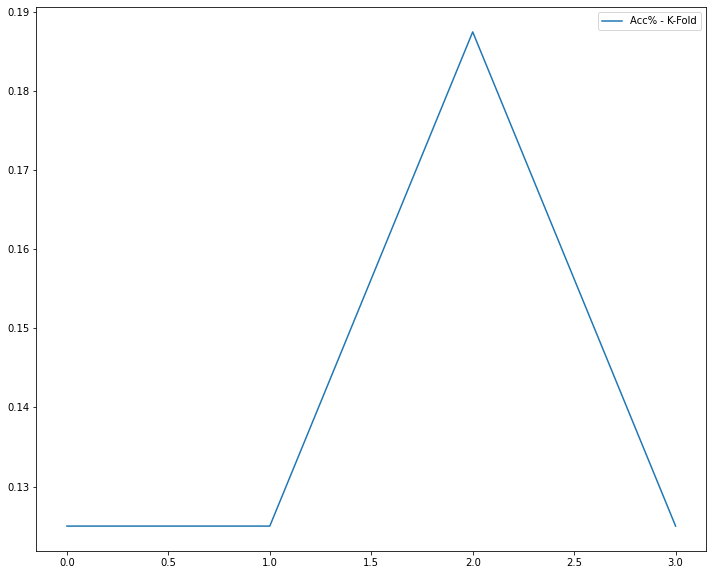

In [629]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(resultados_mlp, label='Acc% - K-Fold')
plt.legend()
plt.show()

In [630]:
mlp = MLPClassifier(activation="tanh")
mlp.fit(X_treino, y_treino)
mlp.score(X_teste, y_teste)

0.2

In [631]:
y_pred = svc.predict(X_teste)

ps = precision_score(y_teste, y_pred, average='macro')
rs = recall_score(y_teste, y_pred, average='macro')
f1 = f1_score(y_teste, y_pred, average='macro')
print(f'Precision: {ps} \t Recall: {rs} \t F1: {f1}')

Precision: 0.5833333333333333 	 Recall: 0.5833333333333333 	 F1: 0.5833333333333333
